In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math


---
# VIDEO: Standard matrix multiplication, parts 1 & 2
---


In [12]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
np.matmul(A,A)
np.matmul(np.matrix.transpose(A),C)
np.matmul(B,np.matrix.transpose(B))
np.matmul(np.matrix.transpose(B),B)
np.matmul(B,C)
np.matmul(C,B)
np.matmul(np.matrix.transpose(C),B)
np.matmul(C,np.matrix.transpose(B))

ValueError: shapes (4,3) and (4,3) not aligned: 3 (dim 1) != 4 (dim 0)


---
# VIDEO: Order-of-operations on matrices
---


In [6]:

n = 2
L = np.random.randn(n,n)
I = np.random.randn(n,n)
V = np.random.randn(n,n)
E = np.random.randn(n,n)

# result of "forward" multiplication and then transpose
res1 = np.matrix.transpose( L @ I @ V @ E )

# result of "flipped" multiplication of transposed matrices
res2 = np.matrix.transpose(E) @ np.matrix.transpose(V) @ np.matrix.transpose(I) @ np.matrix.transpose(L)

# test equality by subtracting (ignore possible computer rounding errors)
res1-res2

array([[ 2.77555756e-17, -1.38777878e-17],
       [-4.44089210e-16, -2.77555756e-17]])


---
# VIDEO: Matrix-vector multiplication
---


In [5]:

# number of elements
m = 4

# create matrices
N = np.round( 10*np.random.randn(m,m) )
S = np.round( np.matrix.transpose(N)*N/m**2 ) # scaled symmetric

# and vector
w = np.array([-1, 0, 1, 2])

# with symmetric matrix
# NOTE: The @ symbol for matrix multiplication is relatively new to Python
S@w    # 1
np.matrix.transpose(S@w) # 2
w@S    # 3
np.matrix.transpose(w)@np.matrix.transpose(S)  # 4
np.matrix.transpose(w)@S   # 5


# with nonsymmetric matrix
N@w    # 1
np.matrix.transpose(N@w) # 2
w@N    # 3
np.matrix.transpose(w)@np.matrix.transpose(N)  # 4
np.matrix.transpose(w)@N   # 5


array([ -6.,  -4., -19.,  22.])


---
# VIDEO: 2D transformation matrices
---


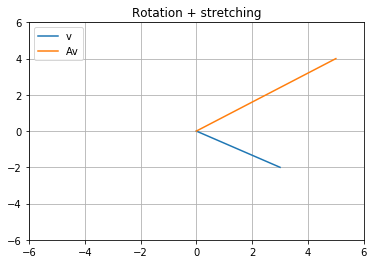

In [9]:
# 2D input vector
v = np.array([ 3, -2 ])

# 2x2 transformation matrix
A = np.array([ [1,-1], [2,1] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.title('Rotation + stretching')
plt.show()

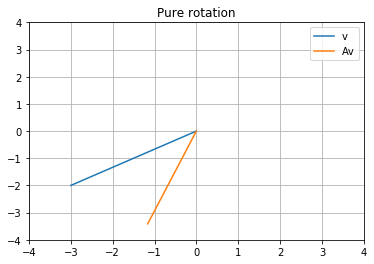

In [8]:
## pure rotation

# 2D input vector
v = np.array([ -3, -2 ])

# 2x2 rotation matrix
th = 5*np.pi/24
A = np.array([ [math.cos(th),-math.sin(th)], [math.sin(th),math.cos(th)] ])

# output vector is Av (convert v to column)
w = A@np.matrix.transpose(v)


# plot them
plt.plot([0,v[0]],[0,v[1]],label='v')
plt.plot([0,w[0]],[0,w[1]],label='Av')

plt.grid()
plt.axis((-4, 4, -4, 4))
plt.legend()
plt.title('Pure rotation')
plt.show()


---
# VIDEO: Additive and multiplicative matrix identities
---


In [60]:
# size of matrices
n = 4

A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n,n)
Z = np.zeros((n,n))

# test both identities
np.array_equal( A@I , A   )
np.array_equal( A   , A@I )
np.array_equal( A   , A+I )

np.array_equal( A   , A+I )
np.array_equal( A+Z , A@I )


True


---
# VIDEO: Additive and multiplicative symmetric matrices
---


In [86]:
## the additive method

# specify sizes
m = 5
n = 5

# create matrices
A = np.random.randn(m,n)
S = ( A + np.matrix.transpose(A) )/2

# A symmetric matrix minus its transpose should be all zeros
print( S-np.matrix.transpose(S) )


[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [96]:
## the multiplicative method

# specify sizes
m = 5
n = 3

# create matrices
A   = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - np.matrix.transpose(AtA) )
print( AAt - np.matrix.transpose(AAt) )



(3, 3)
(5, 5)
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]



---
# VIDEO: Element-wise (Hadamard) multiplication
---


In [100]:
# any matrix sizes
m = 13
n =  2

# ...but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# note the different syntax compared to @ for matrix multiplication
C = np.multiply( A,B )

print(C)


[[ -7.66323146e-01  -8.25906929e-02]
 [ -3.90966578e-02   3.55398187e-01]
 [  2.56140438e-01   8.10723166e-02]
 [ -3.34874260e+00  -1.01767138e+00]
 [  1.10493988e+00   1.31099017e-01]
 [ -2.04041307e+00  -1.72216741e+00]
 [ -3.82003034e-02   6.25393221e-01]
 [ -5.75491697e-01   1.34932994e+00]
 [  1.06584279e+00  -6.19962559e-01]
 [ -3.27215150e-01   4.13362140e-02]
 [  1.86198252e-01  -1.57051310e-01]
 [ -1.91929460e-03   2.33527471e-01]
 [ -1.95764360e-01   1.84572276e-01]]



---
# VIDEO: Multiplication of two symmetric matrices
---


In [40]:
# using the sympy library
from sympy import *

a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = symbols('a b c d e f g h k l m n o p q r s t u', real=True)

# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])


# confirmation that A and B are symmetric
print( A - A.transpose() )
print( B - B.transpose() )

# ... and constant diagonal
for i in range(0,np.size(A,0)):
    print( A[i,i] )
for i in range(0,np.size(B,0)):
    print( B[i,i] )


Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
a
a
a
a
l
l
l
l


In [56]:

# but AB neq (AB)'
A@B - (A@B).T

# maybe for a submatrix?
n = 3
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1*B1).T

Matrix([
[         0,  c*q - e*n, b*q - e*m],
[-c*q + e*n,          0, b*n - c*m],
[-b*q + e*m, -b*n + c*m,         0]])


---
# VIDEO: Frobenius dot-product
---


In [133]:
# any matrix sizes
m = 9
n = 4

# but the two matrices must be the same size
A = np.random.randn(m,n)
B = np.random.randn(m,n)

# first vectorize, then vector-dot-product
Av = np.reshape( A,m*n, order='F' ) # order='F' reshapes by columns instead of by rows
Bv = np.reshape( B,m*n, order='F' )
frob_dp = np.dot( Av,Bv )

# trace method
frob_dp2 = np.trace( np.matrix.transpose(A)@B )
print(frob_dp2)
print(frob_dp)

# matrix norm
Anorm  = np.linalg.norm(A,'fro')
Anorm2 = np.sqrt( np.trace( np.matrix.transpose(A)@A ) )
print(Anorm)
print(Anorm2)

-9.04942176577
-9.04942176577
6.3470309416
6.3470309416
